In [5]:
import aerosandbox as asb
import aerosandbox.numpy as np
import timeit

In [3]:
def time_rosen(N):
    opti = asb.Opti()

    x = opti.variable(init_guess=4 * np.ones(shape=N))

    x1 = x[:-1]
    x2 = x[1:]

    f = np.sum(100 * (x2 - x1 ** 2) ** 2 + (1 - x1) ** 2)

    opti.minimize(f)

    return opti.solve(verbose=False)

from tqdm import tqdm

ns = np.geomspace(2, 20000, 50)
ns = np.round(ns)
ns = np.unique(ns)
ns = np.sort(ns)
ns = ns.astype(int)
ns = ns[::-1]

times = []

for n in tqdm(ns):
    times_run = timeit.repeat(
        lambda: time_rosen(n),
        repeat=20,
        number=1
    )
    times.append(
        np.min(np.array(times_run))
    )

ns = np.array(ns)
times = np.array(times)

100%|██████████| 48/48 [01:30<00:00,  1.88s/it]


In [6]:
# Save Cache
np.savez("ndim_rosen_scaling_data.npz", ns, times)

In [6]:
# Load Cache
file = np.load("ndim_rosen_scaling_data.npz")
print(file.files)
ns = file['arr_0']
times = file['arr_1']

['arr_0', 'arr_1']


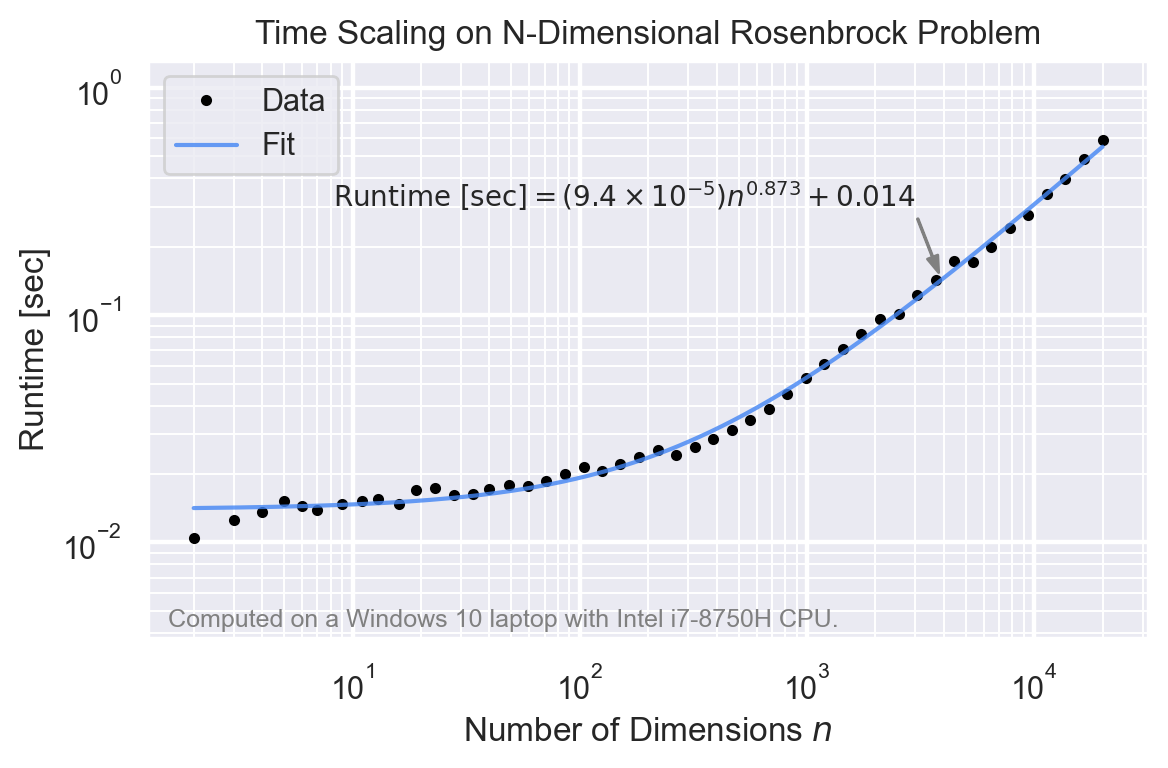

In [10]:
from aerosandbox.tools.pretty_plots import plt, sns, mpl, show_plot
from aerosandbox.tools.string_formatting import latex_sci_notation_string

fig, ax = plt.subplots()
plt.loglog(ns, times, ".k", label="Data")

ns_fine = np.geomspace(2, 20000, 500)

model = asb.FittedModel(
    model = lambda x, p: p['a'] * x ** p['b'] + p['c'],
    x_data = ns,
    y_data=times,
    parameter_guesses={
        "a": 9.4e-5,
        "b": 0.9,
        "c": 1e-2,
        # "d": 0.1
    },
    parameter_bounds={
        "b": (0.7, 1.2),
        # "d": (0, 0.5)
    },
    verbose=False,
    put_residuals_in_logspace=True
)
plt.plot(
    ns_fine,
    model(ns_fine),
    label="Fit",
    alpha=0.8
)
p = model.parameters
plt.annotate(
    text=rf"$\mathrm{{Runtime\ [sec]}} = ({latex_sci_notation_string(p['a'])})n^{{ {p['b']:.3g} }} + {p['c']:.3g}$",
    # text=rf"$\mathrm{{Runtime\ [sec]}} = ({latex_sci_notation_string(p['a'])})n^{{ {p['b']:.3g} }} + ({latex_sci_notation_string(p['c'])})n^{{ {p['d']:.3g} }}$",
    xy=(3.8e3, model(3.8e3)*1.1),
    xytext=(3e3, 3e-1),
    xycoords="data",
    ha="right",
    arrowprops={
        "color"     : "gray",
        "width"     : 0.25,
        "headwidth" : 4,
        "headlength": 6,
    },
    fontsize=10
)

plt.axis('equal')
plt.ylim(1e-2, 5e-1)
plt.annotate(
    text="Computed on a Windows 10 laptop with Intel i7-8750H CPU.",
    xy=(0.02, 0.02),
    xycoords="axes fraction",
    ha="left",
    fontsize=9,
    color="gray",
)

show_plot(
    "Time Scaling on N-Dimensional Rosenbrock Problem",
    r"Number of Dimensions $n$",
    r"Runtime [sec]",
    show=False
)
# plt.savefig(r"C:\Users\User\Dropbox (MIT)\School\Grad School\2021 Spring\Thesis\TeX\figures\nd-rosen.pgf")
plt.show()